In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression, Lasso
import scipy.linalg as la
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

### Pergunta 1

#### a) -> ii

In [3]:
D = pickle.load(open('A48286_Q001_data.p', 'rb'))
x = D['x']
y = D['y']
folds = D['folds']
print('x->',x.shape)
print('y->',y.shape)

x-> (217,)
y-> (217,)


(130,)
(130,)


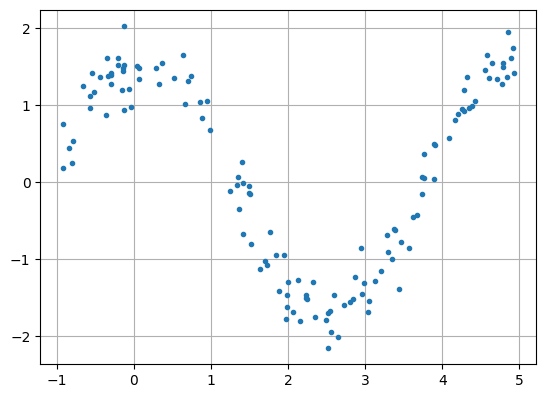

In [4]:
xf0 = x[folds==0]
yf0 = y[folds==0]
print(xf0.shape)
print(yf0.shape)

plt.plot(xf0, yf0, '.')
plt.axis('scaled')
plt.grid()

(87,)
(87,)


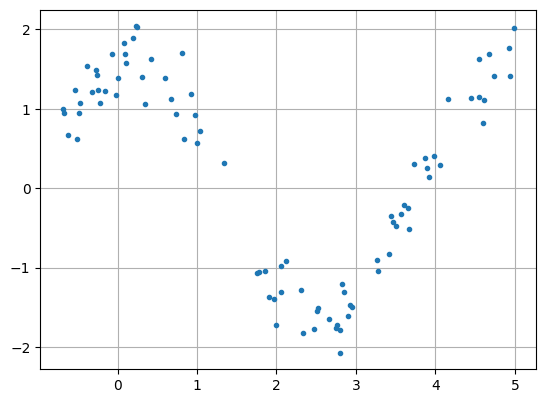

In [5]:
xf1 = x[folds==1]
yf1 = y[folds==1]
print(xf1.shape)
print(yf1.shape)

plt.plot(xf1, yf1, '.')
plt.axis('scaled')
plt.grid()

In [9]:
# ii
x0 = xf0.copy()[np.newaxis]
x1 = xf1.copy()[np.newaxis]
y0 = yf0.copy()
y1 = yf1.copy()

poly = PolynomialFeatures(degree=3, include_bias=False).fit(x0.T, y0)
x0a = poly.transform(x0.T).T
x1a = poly.transform(x1.T).T

lr = LinearRegression().fit(x0a.T, y0)

print('R2 no teste: ', lr.score(x1a.T, y1))
y1e = lr.predict(x1a.T)
print('MRE no teste: ', np.mean((y1-y1e)**2))

R2 no teste:  0.7997090164541405
MRE no teste:  0.31185167329408064


#### b) ->i

In [10]:
# i
x0 = xf0.copy()[np.newaxis]
x1 = xf1.copy()[np.newaxis]
y0 = yf0.copy()
y1 = yf1.copy()

poly = PolynomialFeatures(degree=4, include_bias=False).fit(x0.T, y0)
x0a = poly.transform(x0.T).T
x1a = poly.transform(x1.T).T

lr = LinearRegression().fit(x0a.T, y0)

y0e = lr.predict(x0a.T)
y1e = lr.predict(x1a.T)

print('MRE no teste: ', np.mean((y1-y1e)**2))
print('MAE no treino: ', np.mean(np.abs(y0-y0e)))

MRE no teste:  0.10745113170717412
MAE no treino:  0.25295898958387386


### Pergunta 2

In [11]:
from sklearn.datasets import load_diabetes

D = load_diabetes()
D.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [16]:
X = D['data'].T
y = D['target']

X1 = X[:, :174]
y1 = y[:174]

X2 = X[:, 174:]
y2 = y[174:]

#### a) -> iii

In [17]:
# iii
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1.T)
X1a = poly.transform(X1.T).T
X2a = poly.transform(X2.T).T


lasso = Lasso(random_state=42, alpha=0.01).fit(X1a.T, y1)

y2e = lasso.predict(X2a.T)

W = lasso.coef_
print("Nº de coef diferentes de 0: ", np.sum(W != 0))
print("MAE no teste: ", np.mean(np.abs(y2-y2e)))

Nº de coef:  17
MAE no teste:  43.21120656597126


#### b) -> iii

In [18]:
# iii
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1.T)
X1a = poly.transform(X1.T).T

lr = LinearRegression().fit(X1a.T, y1)

print("Nº de coef incluindo w0: ", lr.coef_.shape[0] + 1)

poly = PolynomialFeatures(degree=4, include_bias=False).fit(X1.T)
X1a = poly.transform(X1.T).T

lr = LinearRegression().fit(X1a.T, y1)
print('Nº de coef incluindo w0:' , lr.coef_.shape[0] + 1)

Nº de coef incluindo w0:  286
Nº de coef incluindo w0: 1001


### Pergunta 3

In [30]:
D = pickle.load(open('A48286_Q003_data.p', 'rb'))
X = D['X']
y = D['y']
y.shape

(2301,)

#### a) -> i

In [31]:
X = np.vstack((np.ones(X.shape[1]), X))
idx = np.argsort(y)

y = y[idx]
X = X[:, idx]
y[y==0] = -1

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
wMSE = np.dot(la.pinv(Rx), rxy)

w = np.array([0.00, 0.70, -0.72])
ye = np.dot(w.T, X)
Ye = ye.copy()

Ye[ye<0] = -1
Ye[ye>=0] = 1
print(confusion_matrix(y, Ye))

[[ 638  183]
 [  54 1426]]


In [32]:
# i
TN = 638
TP = 1426
FN = 54
FP = 183

print('acertos w0: ', TN)
recall = TP/(TP+FN)
print('recall: ', recall)

acertos w0:  638
recall:  0.9635135135135136


#### b) -> ii

In [33]:
ye = np.dot(wMSE.T, X)
Ye  = ye.copy()

Ye[ye<0] = -1
Ye[ye>=0] = 1
print(confusion_matrix(y, Ye))

[[ 793   28]
 [   0 1480]]


In [37]:
print('acertos w1: ', 1480)
print('mse: ', np.mean((y-ye)**2))

acertos w1:  1480
mse:  0.4734407010523959


### Save

In [39]:
QD = pickle.load(open('A48286_Ficha4_Respostas.p', 'rb'))
# Pergunta 1
QD['Q001'][0,:] = np.array([0,1,0,0]) # 2
QD['Q001'][1,:] = np.array([1,0,0,0]) # 1
QD['Q002'][0,:] = np.array([0,0,1,0]) # 3
QD['Q002'][1,:] = np.array([0,0,1,0]) # 3
QD['Q003'][0,:] = np.array([1,0,0,0]) # 1
QD['Q003'][1,:] = np.array([0,1,0,0]) # 2

# Save
pickle.dump(QD, open('A48286_Ficha4_Respostas.p', 'wb'))

# Show data
pickle.load(open('A48286_Ficha4_Respostas.p', 'rb'))

{'Q001': array([[0., 1., 0., 0.],
        [1., 0., 0., 0.]]),
 'Q002': array([[0., 0., 1., 0.],
        [0., 0., 1., 0.]]),
 'Q003': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.]]),
 'nome': 'Tomas Miguel Baptista de Matos',
 'numero': 'A48286'}